In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
path = f"{root}/ablation_slice_batch_size"

dfc = rs.load_configs(
    path,
    properties=False,
)

  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
dfc.unique_per_col()

,24,16,32
slice_batch_size,4,4,2


,4,2
num_workers,6,4


,"(32, 32, 32, 32)","(64, 64, 64, 64)"
filters,5,5


In [4]:
df = rs.load_metrics(dfc)

  0%|          | 0/10 [00:00<?, ?it/s]

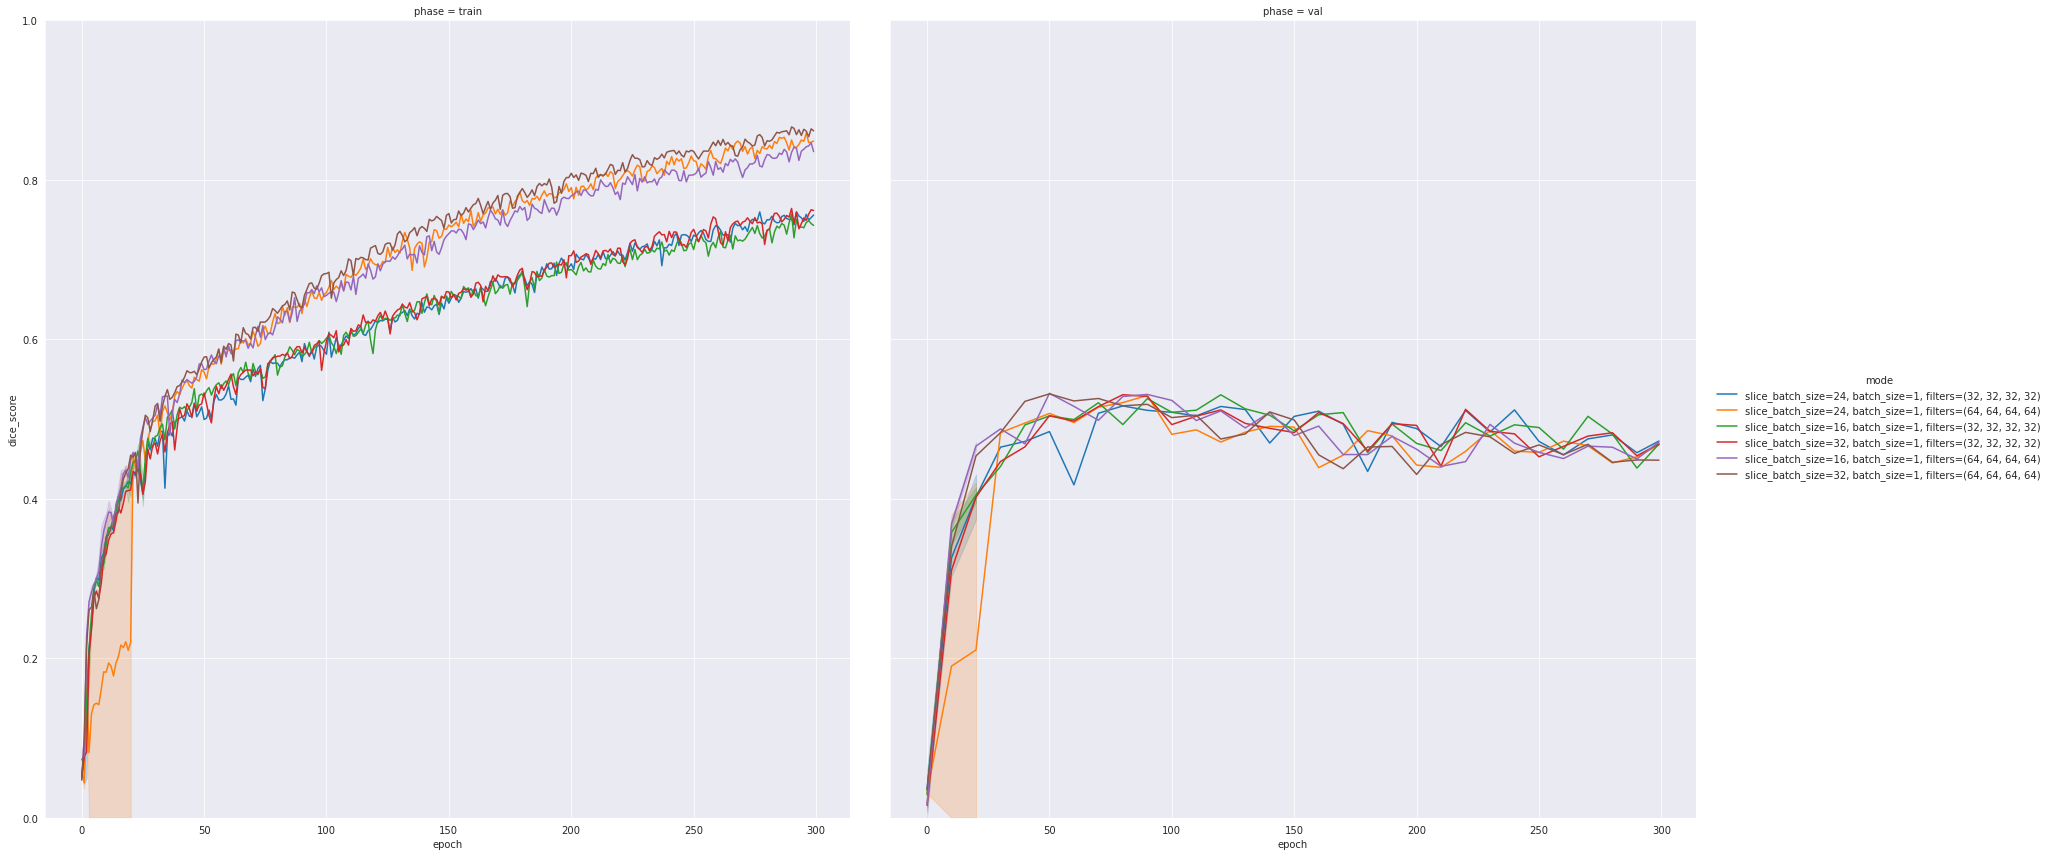

In [5]:
def mode(slice_batch_size, batch_size, filters):
    return f"slice_batch_size={slice_batch_size}, batch_size={batch_size}, filters={filters}"
df.augment(mode)

g = sns.relplot(
    data=df,
    x='epoch',
    y='dice_score',
    col='phase',
    hue='mode',
    kind='line',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
g.set(ylim=(0, 1))